# Graduate University Admissions Prediction Using Regression


**Problem Statement**

Statement: Analyze the dataset given and use regression techniques to
measure the graduation rate of students in a university.

**Task 1: Download the Dataset**

In [54]:
!wget https://www.dropbox.com/s/f1x86l7xkdkz6ke/Admission_Predict.csv

--2025-01-15 14:53:39--  https://www.dropbox.com/s/f1x86l7xkdkz6ke/Admission_Predict.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/21ov7b938izxbl784nfvr/Admission_Predict.csv?rlkey=y6pir1ac44vxt44dl04ddqpl4 [following]
--2025-01-15 14:53:40--  https://www.dropbox.com/scl/fi/21ov7b938izxbl784nfvr/Admission_Predict.csv?rlkey=y6pir1ac44vxt44dl04ddqpl4
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb1b4580f6fb441df21b95d1ddb.dl.dropboxusercontent.com/cd/0/inline/CiPasRrTJso86nT3EhM6EdSEKV5CTNacRxChfEzeNRwMCszr2-2_1EsmIqA9Hd6PVmjxpVT50WOBsgnJynJ-NjHZAZXDaHn9Z1_Eb8eh5git7ufv9L9phL74T0h3M8uS7yvtQns9VJnsTgkQt0QP0iUI/file# [following]
--2025-01-15 14:53:40--  https://ucb1b4580f6fb441df21b95d1ddb.dl.dropboxus

**Task 2: Install Required Libraries**

In [55]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn pandas-profiling sweetviz humanize ydata_profiling

In [56]:
import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso

from ydata_profiling import ProfileReport  # Replacing pandas_profiling as it didnt work for me(depreciation error)
import sweetviz as sv
import humanize

**Task 3:** ***Load and Analyze the Dataset*** (Analyze the data using Pandas Profiling and
sweetviz)

In [57]:
data = pd.read_csv("Admission_Predict.csv") # for reading dataset

In [58]:
print(data.head()) # Display the first five rows

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65  


In [59]:
print(data.info()) # Display summary information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None


In [60]:
print(data.describe()) #statistics summary of dataset

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit  
count  500.00000  500.000000  500.000000        500.00000  
mean     3.48400    8.576440    0.560000          0.72174  
std      0.92545    0.604813    0.496884          0.14114  
min      1.00000    6.800000    0.000000          0.34000  
25%   

In [61]:
profile = ProfileReport(data, title="Admission Predict Data Profiling", explorative=True) #analyzing using data_profiling
profile.to_file("admission_predict_profiling_report.html")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [62]:
report = sv.analyze(data)
report.show_html("admission_predict_sweetviz_report.html") #analzying using sweetviz library

                                             |          | [  0%]   00:00 -> (? left)

Report admission_predict_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Task 4: Pre-process the data by removing outliers, dropping columns, etc.**

In [63]:
print(data.isnull().sum()) #To check for null values

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [64]:
data_cleaned = data.drop(['Serial No.'], axis=1) # Drop 'Serial No.' column

In [65]:
data_cleaned = data_cleaned.dropna()
data_cleaned['CGPA'].fillna(data_cleaned['CGPA'].mean(), inplace=True)

<ipython-input-65-532a45a1b2fe>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['CGPA'].fillna(data_cleaned['CGPA'].mean(), inplace=True)


In [66]:
from scipy import stats

# Identifying outliers using Z-score where threshold = 3
z_scores = stats.zscore(data_cleaned.select_dtypes(include=[np.number]))
data_cleaned = data_cleaned[(np.abs(z_scores) < 3).all(axis=1)]

**Task 5: Data Visualization**

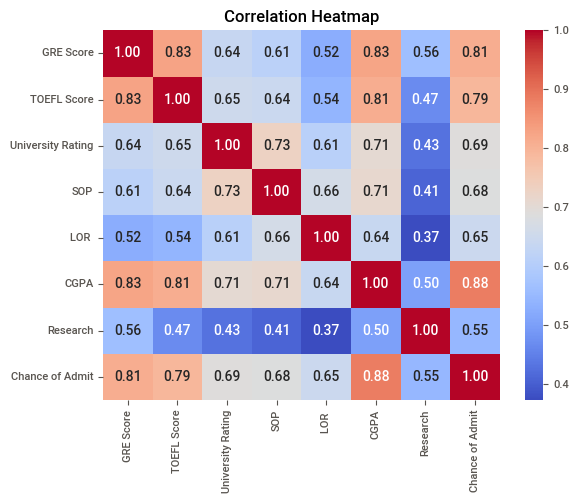

In [67]:
correlation_matrix = data_cleaned.corr() # It will calculate the pairwise correlation between the numerical columns of the cleaned dataset
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f') #It will create heatmap
plt.title('Correlation Heatmap') #title of heatmap
plt.show()  #display the heatmap

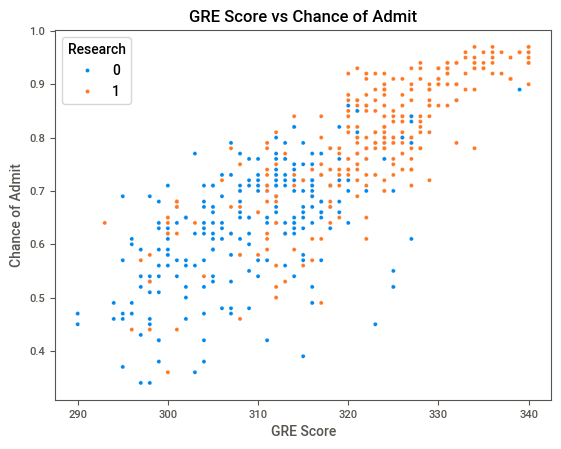

In [68]:
sns.scatterplot(data=data_cleaned, x='GRE Score', y='Chance of Admit', hue='Research') # Scatter plot to visualize the relationship between GRE Score and Chance of Admit
plt.title('GRE Score vs Chance of Admit') #title of scattermap
plt.show() #it will display the scatterplot

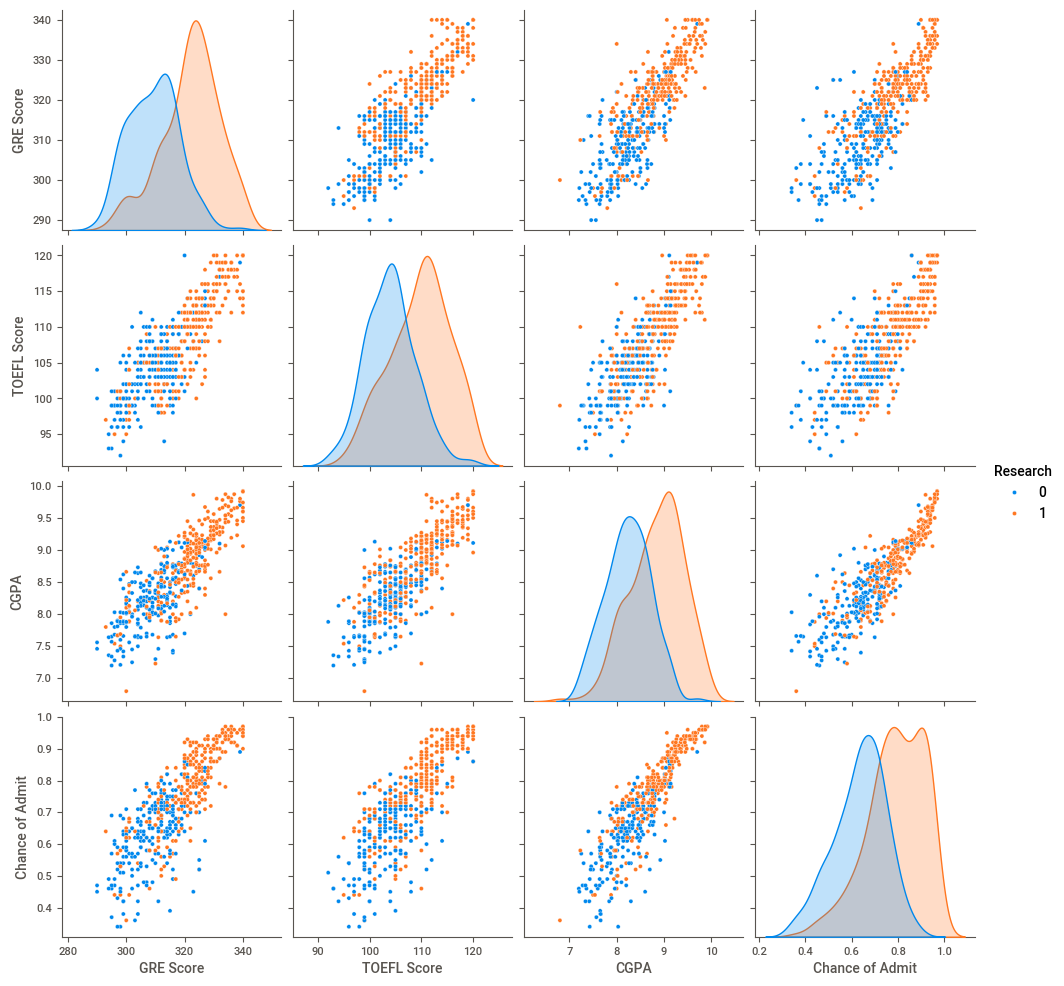

In [69]:
sns.pairplot(data_cleaned[['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit', 'Research']], hue='Research') # Create a pairplot to visualize relationships between selected numerical columns and categorize by 'Research'
plt.show()

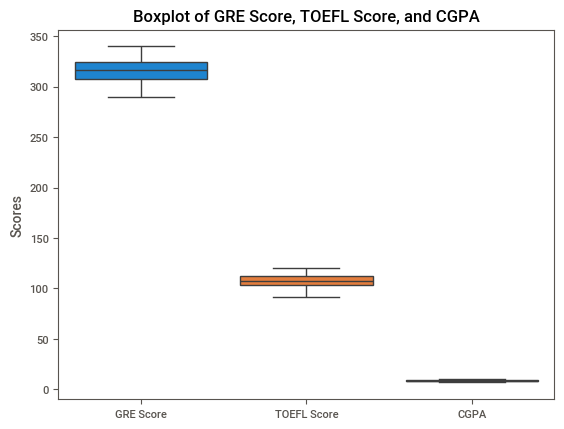

In [70]:
sns.boxplot(data=data_cleaned[['GRE Score', 'TOEFL Score', 'CGPA']]) # Create a boxplot for GRE Score, TOEFL Score, and CGPA to visualize the distribution and outliers
plt.title('Boxplot of GRE Score, TOEFL Score, and CGPA')
plt.ylabel('Scores')
plt.show()

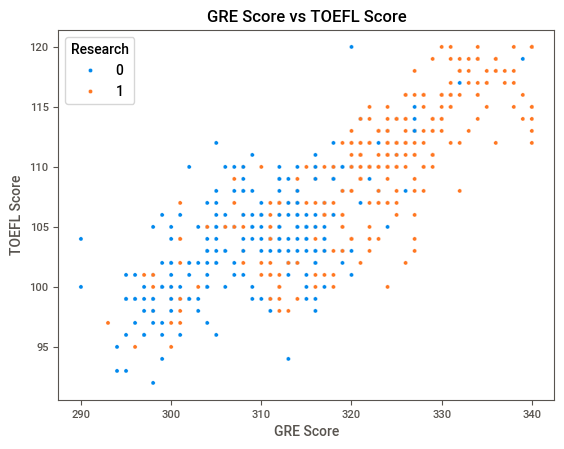

In [71]:
sns.scatterplot(data=data_cleaned, x='GRE Score', y='TOEFL Score', hue='Research') # Scatter plot to visualize the relationship between GRE Score and TOEFL Score
plt.title('GRE Score vs TOEFL Score')
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')
plt.show()

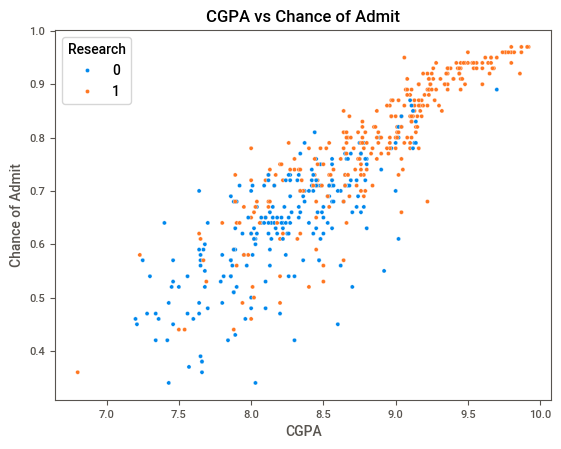

In [72]:
sns.scatterplot(data=data_cleaned, x='CGPA', y='Chance of Admit', hue='Research') #it will # Scatter plot to visualize the relationship between CGPA and Chance of Admit
plt.title('CGPA vs Chance of Admit')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.show()

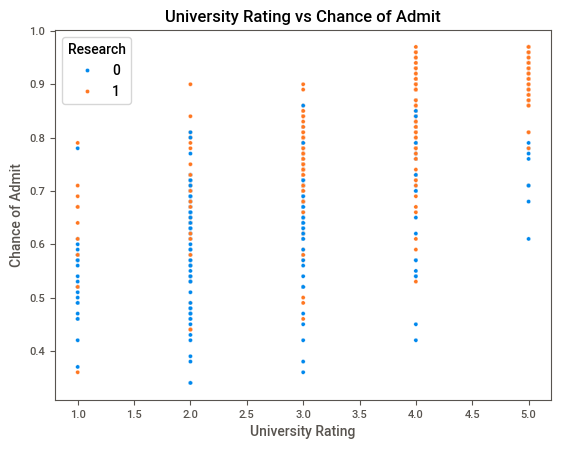

In [73]:
sns.scatterplot(data=data_cleaned, x='University Rating', y='Chance of Admit', hue='Research') # Scatter plot to visualize the relationship between University Rating and Chance of Admit
plt.title('University Rating vs Chance of Admit')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit')
plt.show()

**Task 6: Scaling the Data and Using Linear Regression**

In [74]:
X = data_cleaned.drop('Chance of Admit', axis=1) # Separate the features (X) and the target variable (y) and also all columns except 'Chance of Admit'
y = data_cleaned['Chance of Admit']  # Target: 'Chance of Admit'

In [75]:
scaler = MinMaxScaler()  # this will create an instance of MinMaxScaler
X_scaled = scaler.fit_transform(X)  # Scale the features to the range [0, 1]


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # this will Split the data into training and testing sets (80% for training, 20% for testing)

In [77]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Comparing Multiple Regression Models
from sklearn.linear_model import Ridge, Lasso

# Define models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

# Function to train and evaluate models
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluation metrics
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        print(f"{name} Model:")
        print(f"R-squared: {r2:.3f}, MSE: {mse:.3f}\n")

# Run the comparison
train_and_evaluate(models, X_train, X_test, y_train, y_test)

Linear Regression Model:
R-squared: 0.819, MSE: 0.004

Ridge Regression Model:
R-squared: 0.816, MSE: 0.004

Lasso Regression Model:
R-squared: -0.007, MSE: 0.021



In [78]:
model = LinearRegression() # it will Create an instance of the LinearRegression model
model.fit(X_train, y_train) # Fit the model to the training data

LinearRegression()

In [79]:
y_pred = model.predict(X_test) # Make predictions using the test set

In [80]:
print("Coefficients: ", model.coef_)  # Coefficients for each feature
print("Intercept: ", model.intercept_)  # Intercept value

Coefficients:  [0.12172192 0.08388445 0.01027519 0.00725476 0.06895193 0.3510845
 0.02402679]
Intercept:  0.34696505839455793


**Task 7: Model Evaluation & Pairwise Correlation**

In [81]:
# 1.1 Calculating R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared score: {r2}')  # This will indicate how well the model explains the variance in the target variable.

R-squared score: 0.8188432567829628


In [82]:
# 1.2 Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')  # This gives a measure of how far off the predictions are from the actual values.

Mean Squared Error: 0.0037046553987884123


In [83]:
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

r2 = r2_score(y_test, y_pred)
n = len(y_test)  # Number of observations
p = X_test.shape[1]  # Number of features

adj_r2 = adjusted_r2_score(r2, n, p)
print(f"Adjusted R-squared: {adj_r2:.3f}")

Adjusted R-squared: 0.805


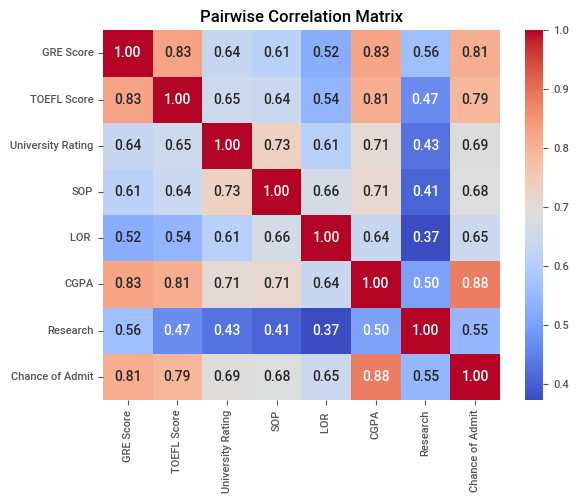

In [84]:
# 2. Pairwise correlation between columns
correlation_matrix = data_cleaned.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f') #correlation matrix
plt.title('Pairwise Correlation Matrix')
plt.show()


In [86]:
print(data_cleaned)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
495        332          108                  5  4.5   4.0  9.02         1   
496        337          117                  5  5.0   5.0  9.87         1   
497        330          120                  5  4.5   5.0  9.56         1   
498        312          103                  4  4.0   5.0  8.43         0   
499        327          113                  4  4.5   4.5  9.04         0   

     Chance of Admit  
0               0.92  
1               0.76  
2     